# Assignment 1 task 1
## Data dimensionality, distance-based classifiers
From the instructions:  
*The purpose of this task is to develop some intuitions about clouds of points in high-dimensional spaces. In
particular, you are supposed to use dimensionality reduction techniques to visualize your data, develop a
very simple algorithm for classifying hand-written digits and compare it to another distance-based classifier.*

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.aspect'] = 'auto'

### Read training data:
* `train_im` = images of numbers with shape (1706, 256) pixel. 
     * Reshape them from 256 to 16x16 and call the array `tim`
* `labels` = correct labeling of each image 
    * Convert to array of integers

In [7]:
train_in = pd.read_csv('train_in.csv').to_numpy()
tim = np.array([x.reshape(16,16) for x in train_im])

labels = pd.read_csv('train_out.csv').to_numpy()
labels = np.array([int(x) for x in labels])

Npix = train_in.shape[1]
print(train_in.shape)
print(tim.shape)
print(labels.shape)

(1706, 256)
(1706, 16, 16)
(1706,)


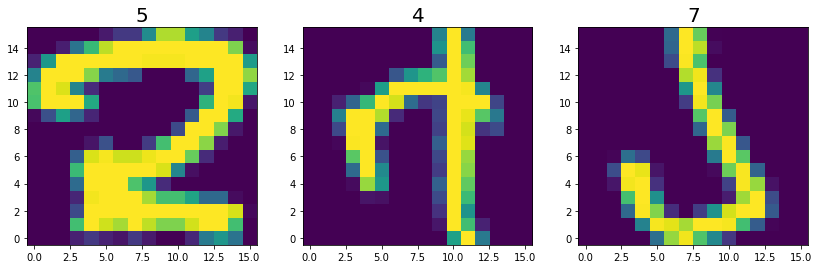

In [8]:
fig, ax = plt.subplots(1,3,figsize=(14,4))

for i in range(len(ax)):
    ax[i].imshow(tim[i])
    ax[i].set_title(labels[i], fontsize=20)
plt.show()

## 1.1 Group images by number and compute the center
For each digit $d$ ($d = 0,1,...,9$) consider a cloud of points $C_d$ with dimension ($N_d$, 256) where $N_d$ is the number of images beloging to number $d$. For each cloud, we can take the center $c_d$ as the mean over $N_d$, resulting in another 256-dim-vector.  
I define a list containing the clouds for every number: `storm`.

In [9]:
storm = [train_in[np.where(labels==x)] for x in range(0,10)]
centers = [np.mean(storm[x], axis=0) for x in range(0,10)]
# Print how many images of each number we have
print('Number \t:\tN_images')
print('-------------------------')
for n in range(10):
    print('{:2} \t:\t {:3}'.format(n+1, storm[n].shape[0]))

Number 	:	N_images
-------------------------
 1 	:	 319
 2 	:	 252
 3 	:	 202
 4 	:	 131
 5 	:	 122
 6 	:	  88
 7 	:	 150
 8 	:	 166
 9 	:	 144
10 	:	 132


### Calculate distance between the centers

AttributeError: 'list' object has no attribute 'shape'

In [23]:
def distance(arr1, arr2):
    return np.sqrt(np.sum(np.power(arr1 - arr2, 2)))

N = len(storm)
# Set up array to store the distance between pairs
dist = np.zeros((N,N))
# Loop twice to get all the pairs
for i in range(N):
    arr1 = centers[i]
    for j in range(N):
        arr2 = centers[j]
        dist[i,j] = distance(arr1, arr2)

Next we plot the resulting 2D array. The higher the distance the easiest it is to labeling them correctly. We observe that **the pair (1,0) has the highest distance** from the rest while the pairs **{(5,3), (6,5), (9,7)} have the lowest** hence those pairs will be the trickiest.

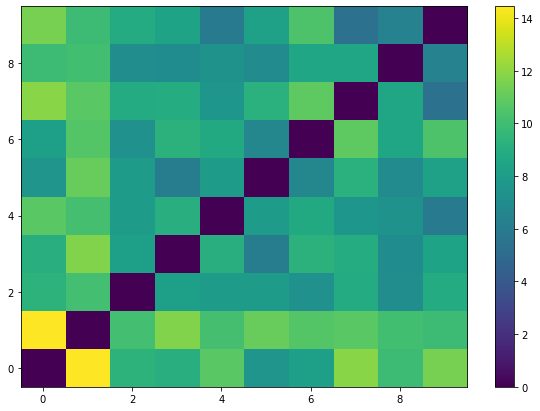

In [24]:
fig, ax = plt.subplots(1, figsize=(10,7))
im = ax.imshow(dist)
fig.colorbar(im)
plt.show()

## 1.2 Experiment with three dimensionality reduction algorithms
* PCA
* UMAP
* T-SNE

## 1.3 Distance-based classifier

## 1.4 K-Nearest-Neighbor

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

